In [110]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# Load the data from the CSV files
medal_tally = pd.read_csv('Olympic_Games_Medal_Tally.csv')
cleaned_data = pd.read_csv('Olympics_Games_cleaned.csv')

In [125]:
# Filter the medal tally data for the specified countries
countries = ["Great Britain", "Australia", "United States", "Greece", "Republic of Korea", 
             "Brazil", "Japan", "Canada", "Spain", "Germany", "People's Republic of China"]

medal_tally_filtered = medal_tally[medal_tally['country'].isin(countries)]

# Check if the country hosted the Olympics
hosted_olympics = cleaned_data[cleaned_data['country_noc'].isin(medal_tally_filtered['country_noc'].unique())]

# Merge the dataframes to add hosting information
merged_data = medal_tally_filtered.merge(hosted_olympics[['year', 'country_noc']], on='year', how='left', suffixes=('', '_host'))

# Add a column indicating if the country was hosting
merged_data['is_host'] = merged_data['country_noc'] == merged_data['country_noc_host']

merged_data['country'] = merged_data['country'].replace({
    "People's Republic of China": "China",
    "Republic of Korea": "South Korea"
})
merged_data.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total,country_noc_host,is_host
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20,GRE,False
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47,GRE,True
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13,GRE,False
3,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7,GRE,False
4,1896 Summer Olympics,1,1896,Australia,AUS,2,0,0,2,GRE,False


In [126]:

# Group by country and hosting status to calculate average medal counts
average_medals = merged_data.groupby(['country', 'is_host'])[['gold', 'silver', 'bronze', 'total']].mean().reset_index()

# Separate data for hosting and non-hosting
hosting_medals = average_medals[average_medals['is_host'] == True]
non_hosting_medals = average_medals[average_medals['is_host'] == False]


In [127]:
# Conduct a one-tailed t-test
stats = ttest_ind(hosting_medals['total'], non_hosting_medals['total']).pvalue
stats

0.01877797113483023

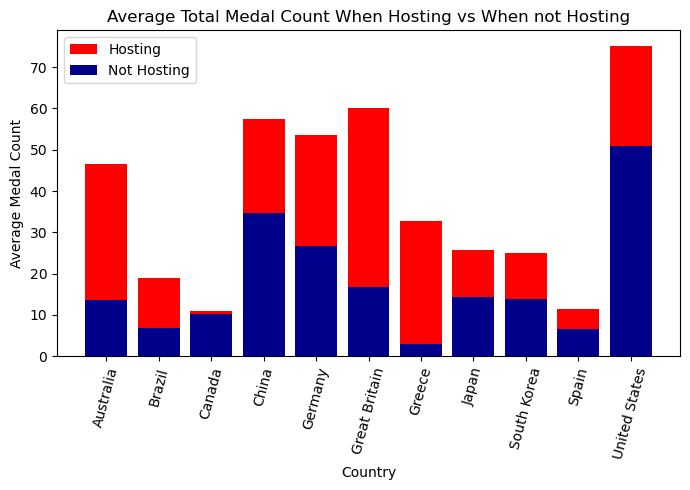

In [139]:
# Visualization 1: Average medal count when hosting vs not hosting
plt.figure(figsize=(7, 5))

plt.bar(hosting_medals['country'], hosting_medals['total'], color='red', label= 'Hosting')
plt.bar(non_hosting_medals['country'], non_hosting_medals['total'], color='darkblue', label = 'Not Hosting')
plt.title('Average Total Medal Count When Hosting vs When not Hosting')
plt.xlabel('Country')
plt.ylabel('Average Medal Count')
plt.xticks(rotation=75)
plt.legend()

plt.tight_layout()
plt.show()

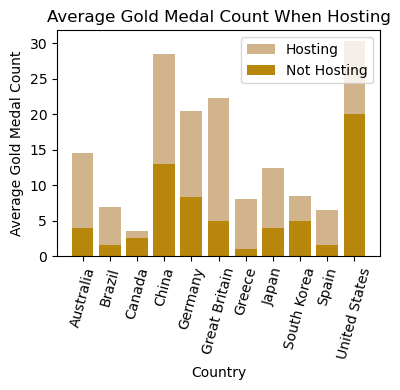

In [136]:
# Visualization 2: Breakdown by medal type (gold, silver, bronze) for hosting vs not hosting
# Part 1: Gold

plt.figure(figsize=(4, 4))

plt.bar(hosting_medals['country'], hosting_medals['gold'], color='tan', label = 'Hosting')
plt.bar(non_hosting_medals['country'], non_hosting_medals['gold'], color='darkgoldenrod', label = 'Not Hosting')
plt.title('Average Gold Medal Count When Hosting')
plt.xlabel('Country')
plt.ylabel('Average Gold Medal Count')
plt.xticks(rotation=75)
plt.legend()


plt.tight_layout()
plt.show()


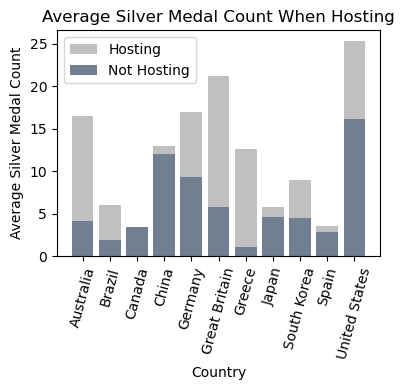

In [137]:
# Visualization 2: Breakdown by medal type (gold, silver, bronze) for hosting vs not hosting
#Part 2: Silver

plt.figure(figsize=(4, 4))

plt.bar(hosting_medals['country'], hosting_medals['silver'], color='silver', label = 'Hosting')
plt.bar(non_hosting_medals['country'], non_hosting_medals['silver'], color='slategrey', label = 'Not Hosting')
plt.title('Average Silver Medal Count When Hosting')
plt.xlabel('Country')
plt.ylabel('Average Silver Medal Count')
plt.xticks(rotation=75)
plt.legend()


plt.tight_layout()
plt.show()

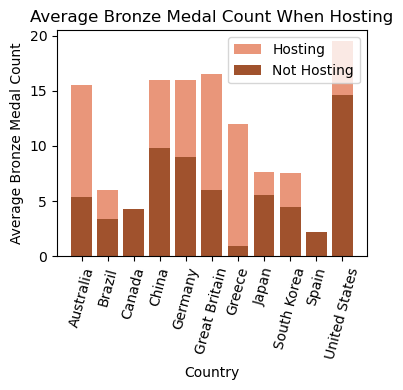

In [138]:
# Visualization 2: Breakdown by medal type (gold, silver, bronze) for hosting vs not hosting
#Part 3: Bronze

plt.figure(figsize=(4, 4))

plt.bar(hosting_medals['country'], hosting_medals['bronze'], color='darksalmon', label = 'Hosting')
plt.bar(non_hosting_medals['country'], non_hosting_medals['bronze'], color='sienna', label = 'Not Hosting')
plt.title('Average Bronze Medal Count When Hosting')
plt.xlabel('Country')
plt.ylabel('Average Bronze Medal Count')
plt.xticks(rotation=75)
plt.legend()


plt.tight_layout()
plt.show()